**<font color=#000000 size=5>1 Look at the Big Picture</font>**  
  
&emsp;&emsp;**<font color=#000000 size=3>1.1 Frame the Problem</font>**  
&emsp;&emsp;&emsp;&emsp;1. the objective is to use existed data to help select which city to expand to next.  
&emsp;&emsp;&emsp;&emsp;2. the model will be used to predict profits for the food truck.  
&emsp;&emsp;&emsp;&emsp;3. no current solution.  
&emsp;&emsp;&emsp;&emsp;4. the model may be supervised, batch and model-based.  
&emsp;&emsp;**<font color=#000000 size=3>1.2 Select a Performance Measure</font>**  
&emsp;&emsp;&emsp;&emsp;1. performance will be measured using RMSE.  
&emsp;&emsp;&emsp;&emsp;2. the performance measure is aligned with the business objective.  
&emsp;&emsp;&emsp;&emsp;3. the minimum performance needed to reach the business objective is that the RMSE should be small so that the predicted profit is close to the real profit.  
&emsp;&emsp;**<font color=#000000 size=3>1.3 Check the assumptions</font>**  
&emsp;&emsp;&emsp;&emsp;1. given population, the model will predict the profit. and the profit can be used to judge if that city is suitable to expand to.  
&emsp;&emsp;&emsp;&emsp;2. the assumption is feasible.  
  
&emsp;&emsp;*  
&emsp;&emsp;&emsp;&emsp;1. the task of predicting house prices is a comparable problem. and the lin reg model that task adopted can be used here.  
&emsp;&emsp;&emsp;&emsp;2. human expertise is available. there are some models made by human for predicting house prices.  
&emsp;&emsp;&emsp;&emsp;3. to manually solve the problem, I will plot data on a coordinate, draw a line to fit as many points as possible. and given data, that is, an x, see the corresponding y value, which is the predicted profit.  


**<font color=#000000 size=5>2 Get the Data</font>**

&emsp;&emsp;**<font color=#000000 size=3>2.1 Create the Workspace</font>**  
&emsp;&emsp;&emsp;&emsp;1. a work space created.  

&emsp;&emsp;**<font color=#000000 size=3>2.2 Download the Data</font>**  
&emsp;&emsp;&emsp;&emsp;1. the population of cities and profits of those cities are needed.  
&emsp;&emsp;&emsp;&emsp;2. data can be fetched from "C:\Users\Neko\Desktop\OneDrive\Python\handson-ml\datasets\ml-AW\ex-1\ex1data1.csv".  
&emsp;&emsp;&emsp;&emsp;3. the data will take about 1.34 KB.  
&emsp;&emsp;&emsp;&emsp;4. legal obligations and authorization are not needed.  
&emsp;&emsp;&emsp;&emsp;5. access authorizations are not needed.  

In [10]:
# get data

# get the data and convert it to a pd obj
import pandas as pd

def get_data(path):
    return pd.read_csv(path)

path = r"C:\Users\Neko\Desktop\OneDrive\Python\handson-ml\datasets\ml-AW\ex-1\ex1data1.csv"
ex1data1 = get_data(path)

\* pd.read_csv(path)  
path! not file data!  
  
\* path = "C:\... ..." (x)  
path = r"C:\... ..." (O)  
path = "C:/... ..."(O)  

&emsp;&emsp;&emsp;&emsp;6. the data is got.  
&emsp;&emsp;&emsp;&emsp;7. the data is converted into a pd obj for manupulation.  
&emsp;&emsp;&emsp;&emsp;8. sensitive info is not contained.  

&emsp;&emsp;**<font color=#000000 size=3>2.3 Take a Quick Look at the Data Structure
</font>**  

In [12]:
# take a look at the top 5 rows
ex1data1.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [13]:
# see info
ex1data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [14]:
# see info of numerical attrs
ex1data1.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D9EF6C5438>,
      dtype=object)

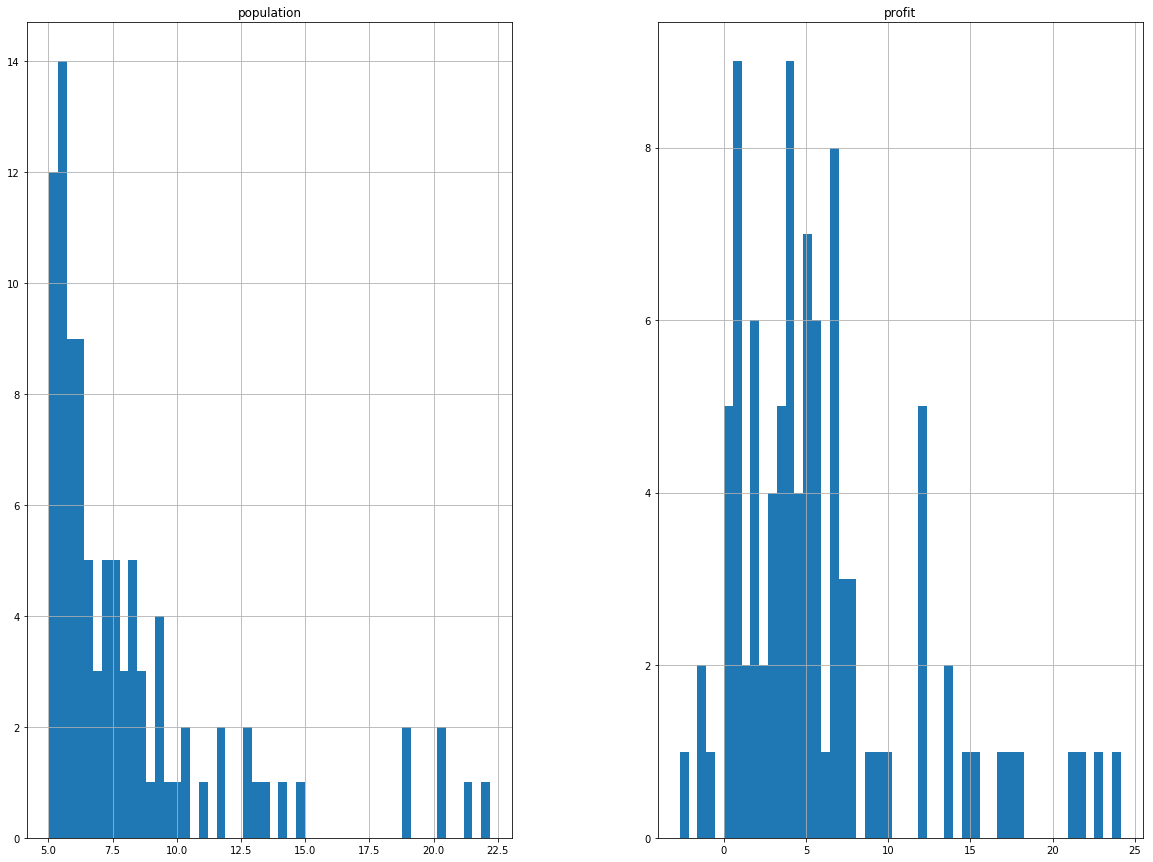

In [20]:
# plot numerical attrs
%matplotlib inline
import matplotlib.pyplot as plt

ex1data1.hist(bins=50, figsize=(20, 15))

\* pd_obj.hist(bins, figsize)

&emsp;&emsp;&emsp;&emsp;1. there are 97 instances, all of the data is float64. 2 attrs. no null values.  polulation mostly falls on 5.0-10.0. profit mostly falls on 0-10 and there are negative values.  the population histogram is tail heavy.  